### Computer Graphics: Triangle and barycentric coordinates, inside-outside test, and triangle filling
###### by Hamed Shah-hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [11]:
# vertices contains the three vertices of triangle
# each vertex is a row of two columns
# function returns points inside with their bary. coords.
def triangle_points_barys(vertices):
    coords=np.asarray(vertices)
    points=[]; barys=[]
    xmin,xmax=int(coords[:,0].min()),int(coords[:,0].max())
    ymin,ymax=int(coords[:,1].min()),int(coords[:,1].max())
    x0,y0=coords[0,:];x1,y1=coords[1,:];x2,y2=coords[2,:]
    detA=(x1*y2-x2*y1)-(x0*y2-x2*y0)+(x0*y1-x1*y0)
    if detA==0: #vertices are on a line
        return None,None
    # formulas of landa's are based on Cramer's rule
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            landa0=(x1*y2-x2*y1)-(x*y2-x2*y)+(x*y1-x1*y)
            landa1=(x*y2-x2*y)-(x0*y2-x2*y0)+(x0*y-x*y0)
            landa2=(x1*y-x*y1)-(x0*y-x*y0)+(x0*y1-x1*y0)
            landa0/=detA; landa1/=detA; landa2/=detA
            # check if the point is inside or outside
            if landa0<0 or landa1<0 or landa2<0: continue
            points.append([x,y])
            barys.append([landa0,landa1,landa2])
    return np.asarray(points),np.asarray(barys)

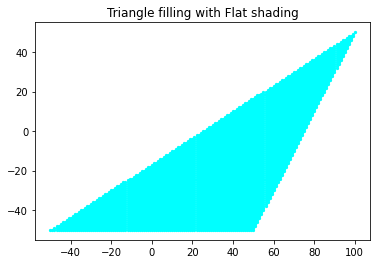

In [12]:
#triangle filling with flat shading
vertices=50*np.array([[-1,-1],[1,-1],[2,1]])
CYAN=(0,255,255); col=np.asarray(CYAN)/255
ps,bs=triangle_points_barys(vertices)
plt.scatter(ps[:,0],ps[:,1],color=col,s=5)
plt.title('Triangle filling with Flat shading')
plt.show()

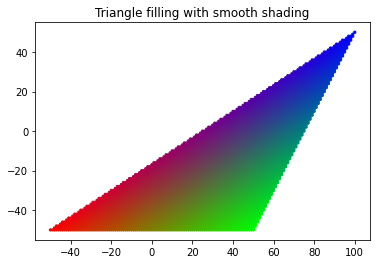

In [13]:
#triangle filling with smooth shading
vertices=50*np.array([[-1,-1],[1,-1],[2,1]])
RED=(255,0,0); GREEN=(0,255,0); BLUE=(0,0,255)
colors=np.array([RED,GREEN,BLUE])
ps,bs=triangle_points_barys(vertices)
cs=[]
for i in range(ps.shape[0]):
    temp=np.dot(bs[i],colors).astype('int')
    cs.append(temp)
cs=np.asarray(cs)/255
plt.scatter(ps[:,0],ps[:,1],c=cs,s=5)
plt.title('Triangle filling with smooth shading')
plt.show()